<div style="width: 30%; float: right; margin: 10px; margin-right: 5%;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/FHNW_Logo.svg/2560px-FHNW_Logo.svg.png" width="500" style="float: left; filter: invert(50%);"/>
</div>

<h1 style="text-align: left; margin-top: 10px; float: left; width: 60%;">
    Soziale Netzwerke Analysieren Projekt:<br> Raumsonden & Himmelskörper
</h1>

<p style="clear: both; text-align: left;">
    Bearbeitet durch Flurina Riner, Patrick Schürmann, Si Ben Tran im HS 2023.<br>Bachelor of Science FHNW in Data Science.
</p>

# 1 Setup & Libraries

Hier in diesem Abschnitt importieren wir die wichtigsten Libraries für unser Projekt.

In [30]:
# Reload modules
%load_ext autoreload
%autoreload 2

# Standard library
from collections import defaultdict

# Data manipulation
import pandas as pd
import numpy as np
import json

# Visualisation
import matplotlib.pyplot as plt

# Network
import networkx as nx


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2 Daten - 1 Episode

Wir schaffen uns zuerst einen Überblick über die Daten, die wir zur Verfügung haben indem wir zuerst nur die erste Episode uns anschauen.   
Dies erreichen wir indem wir die Daten einlesen und diese jeweils in ein Knoten und Kanten DataFrame transformieren und anschliessend diese in Form eines Tuppeles in einer Liste abspeichern. 

In [10]:
# Liste für die Episoden
lst_every_episode = []

# Einlesen der json Daten der jeweiligen Episode
with open('data/Star Wars/starwars-episode-1-interactions-allCharacters.json', 'r') as file:
    data = json.load(file)

# Nodes definieren
nodes = data['nodes']

# Pandas DataFrame erstellen und wrangeln
df_nodes = pd.DataFrame(nodes)
df_nodes = df_nodes.reset_index(drop=False)
df_nodes1 = df_nodes.rename(columns={"index": "ID"})

# Ausgabe der Knoten (Nodes)
display("Knoten", df_nodes1)

# Edges definieren
edges = data['links']
df_edges1 = pd.DataFrame(edges)

# Ausgabe der Kanten (Edges)
display("Kanten", df_edges1)

# Knoten und Kanten Dataframe in Liste speichern
lst_every_episode.append((df_nodes1, df_edges1))
print(len(lst_every_episode[0]))

'Knoten'

,ID,name,value,colour
0,0,R2-D2,33,#bde0f6
1,1,QUI-GON,61,#4f4fb1
2,2,NUTE GUNRAY,19,#808080
3,3,PK-4,3,#808080
4,4,TC-14,5,#808080
5,5,OBI-WAN,34,#48D1CC
6,6,DOFINE,4,#808080
7,7,RUNE,11,#808080
8,8,TEY HOW,5,#808080
9,9,EMPEROR,14,#191970


'Kanten'

,source,target,value
0,15,0,11
1,1,0,14
2,18,0,16
3,0,17,3
4,22,0,2
...,...,...,...
130,6,8,1
131,37,36,2
132,37,16,2
133,18,37,1


2


## 2.1 Soziales Netzwerk Visualisieren
In einem weiteren Schritt visualisieren wir von der jeweilgen Episode die Knoten und Kanten. Dies erreichen wir indem wir einen Graphen `G`erstellen und dann jeweils die Knoten und Kanten hinzufügen. Anschliessend geben wir die Attribute der jeweilgen Knoten und Kanten aus, um zu überprüfen, ob diese geklappt hat.

## 2.2 Graph Initialisieren

In [28]:
# Initialisierung des Graphen
G = nx.Graph()

# Hinzufügen von Knoten zum Graphen
for idx, row in df_nodes1.iterrows():
    G.add_node(row['ID'], label=row['name'], size=row['value'], color=row['colour'])

# Hinzufügen von Kanten zum Graphen
for idx, row in df_edges1.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['value'])

# Ausgabe der Knoten und ihrer Attribute
print("Knoten und ihre Attribute:")
for node, attrs in G.nodes(data=True):
    print(f"Knoten {node}: {attrs}")

# Ausgabe der Kanten und ihrer Attribute
print("\nKanten und ihre Attribute:")
for source, target, attrs in G.edges(data=True):
    print(f"Kante von {source} nach {target}: {attrs}")

Knoten und ihre Attribute:
Knoten 0: {'label': 'R2-D2', 'size': 33, 'color': '#bde0f6'}
Knoten 1: {'label': 'QUI-GON', 'size': 61, 'color': '#4f4fb1'}
Knoten 2: {'label': 'NUTE GUNRAY', 'size': 19, 'color': '#808080'}
Knoten 3: {'label': 'PK-4', 'size': 3, 'color': '#808080'}
Knoten 4: {'label': 'TC-14', 'size': 5, 'color': '#808080'}
Knoten 5: {'label': 'OBI-WAN', 'size': 34, 'color': '#48D1CC'}
Knoten 6: {'label': 'DOFINE', 'size': 4, 'color': '#808080'}
Knoten 7: {'label': 'RUNE', 'size': 11, 'color': '#808080'}
Knoten 8: {'label': 'TEY HOW', 'size': 5, 'color': '#808080'}
Knoten 9: {'label': 'EMPEROR', 'size': 14, 'color': '#191970'}
Knoten 10: {'label': 'CAPTAIN PANAKA', 'size': 20, 'color': '#808080'}
Knoten 11: {'label': 'SIO BIBBLE', 'size': 8, 'color': '#808080'}
Knoten 12: {'label': 'JAR JAR', 'size': 36, 'color': '#9a9a00'}
Knoten 13: {'label': 'TARPALS', 'size': 4, 'color': '#808080'}
Knoten 14: {'label': 'BOSS NASS', 'size': 5, 'color': '#808080'}
Knoten 15: {'label': 'PAD

## 2.3 Graph Visualisierung

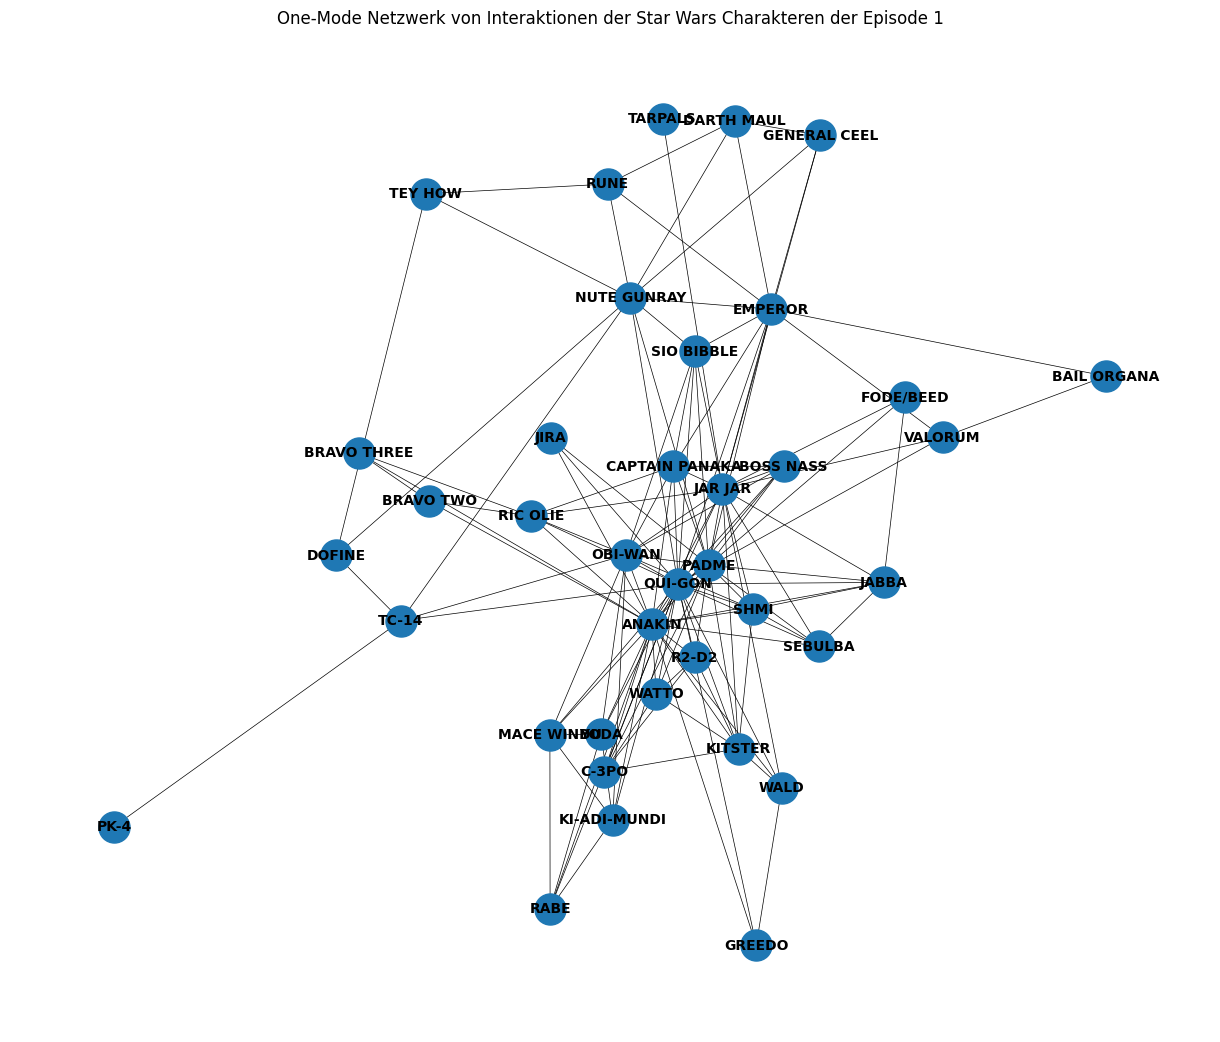

In [29]:
# Labels definieren
labels = {node: data['label'] for node, data in G.nodes(data=True)}

plt.figure(figsize=(12, 10))
# Netzwerkdiagramm zeichnen
nx.draw(G, 
        labels=labels, 
        with_labels=True, 
        node_size=500, 
        edge_color='black', 
        font_size=10, 
        font_weight='bold',
        # alpha=0.5,
        width=0.5,
        pos=nx.spring_layout(G, k=0.1, iterations=20)
       )

plt.title("One-Mode Netzwerk von Interaktionen der Star Wars Charakteren der Episode 1")
plt.show()

# 3 Ganzer Datensatz

Hier in diesem Abschnitt nutzen wir das genutzte Wissen aus dem 2. Abschnitt, die wir vorhin bearbeitet haben.

In [15]:
# Leere Liste für die Episoden
lst_every_episode = []

# Loop über alle Episoden
for episode in range(1, 8):
    filename = f'data/Star Wars/starwars-episode-{episode}-interactions-allCharacters.json'
    with open(filename, 'r') as file:
        data = json.load(file)

        nodes = data['nodes']

        df_nodes = pd.DataFrame(nodes)
        df_nodes = df_nodes.reset_index(drop=False)
        df_nodes = df_nodes.rename(columns={"index": "ID"})

        edges = data['links']
        df_edges = pd.DataFrame(edges)

        G = nx.Graph()

        for idx, row in df_nodes.iterrows():
            G.add_node(row['ID'], label=row['name'], size=row['value'], color=row['colour'])

        for idx, row in df_edges.iterrows():
            G.add_edge(row['source'], row['target'], weight=row['value'])
        
        lst_every_episode.append(G)

## 3.1 Aktor Degree Zentralität

Wir berechnen für jeden Aktor die Degree Zentralität in jeder Episode aus.

In [32]:
# Degree Aktor Zentralität in jeder Episode
for episode in lst_every_episode:
    degree_dict = nx.degree(episode)
    name_degree_list = [(episode.nodes[node]['label'], degree) for node, degree in degree_dict]
    print(name_degree_list)

# Degree Aktor Zentralität für R2-D2 und C-3PO
r2d2_degrees = []
c3po_degrees = []

for episode in lst_every_episode:
    degree_dict = dict(nx.degree(episode))
    
    for node, degree in degree_dict.items():
        character_name = episode.nodes[node]['label']
        if character_name == "R2-D2":
            r2d2_degrees.append(degree)
        elif character_name == "C-3PO":
            c3po_degrees.append(degree)

# Ausgabe der Listen
print("R2-D2 Degrees:", r2d2_degrees)
print("C-3PO Degrees:", c3po_degrees)

[('R2-D2', 6), ('QUI-GON', 26), ('NUTE GUNRAY', 10), ('PK-4', 1), ('TC-14', 5), ('OBI-WAN', 13), ('DOFINE', 3), ('RUNE', 4), ('TEY HOW', 3), ('EMPEROR', 11), ('CAPTAIN PANAKA', 9), ('SIO BIBBLE', 7), ('JAR JAR', 18), ('TARPALS', 1), ('BOSS NASS', 6), ('PADME', 18), ('RIC OLIE', 7), ('WATTO', 6), ('ANAKIN', 23), ('SEBULBA', 6), ('JIRA', 3), ('SHMI', 8), ('C-3PO', 6), ('DARTH MAUL', 4), ('KITSTER', 9), ('WALD', 5), ('FODE/BEED', 3), ('JABBA', 7), ('GREEDO', 3), ('VALORUM', 4), ('MACE WINDU', 6), ('KI-ADI-MUNDI', 6), ('YODA', 6), ('RABE', 5), ('BAIL ORGANA', 2), ('GENERAL CEEL', 4), ('BRAVO TWO', 3), ('BRAVO THREE', 3)]
[('R2-D2', 3), ('CAPTAIN TYPHO', 3), ('EMPEROR', 9), ('SENATOR ASK AAK', 7), ('ORN FREE TAA', 3), ('MACE WINDU', 10), ('YODA', 10), ('KI-ADI-MUNDI', 5), ('BAIL ORGANA', 7), ('JAR JAR', 10), ('OBI-WAN', 18), ('ANAKIN', 21), ('PADME', 17), ('PK-4', 1), ('SIO BIBBLE', 1), ('SOLA', 4), ('JOBAL', 4), ('RUWEE', 4), ('TAUN WE', 4), ('LAMA SU', 2), ('BOBA FETT', 3), ('JANGO FETT',

## 3.2 Häufigkeits Attribut der Knoten

Weil ein Character in mehreren Filmen auftauchen kann, fügen wir ein Attribut hinzu, welches die Absolute Häufigkeit der Auftritte eines Characters in allen Filmen zählt.

In [31]:
# Dictionary für die Charaktere und ihre Häufigkeit
character_counts = defaultdict(int)

for episode in lst_every_episode:
    degree_dict = nx.degree(episode)
    for node, _ in degree_dict:
        character_name = episode.nodes[node]['label']
        character_counts[character_name] += 1

# Sortieren der Charaktere absteigend nach ihrer Häufigkeit
sorted_character_counts = sorted(character_counts.items(), key=lambda x: x[1], reverse=True)

# Ausgabe der sortierten Häufigkeiten
for character, count in sorted_character_counts:
    print(f"{character}: {count}")


R2-D2: 7
C-3PO: 7
OBI-WAN: 6
EMPEROR: 5
YODA: 5
ANAKIN: 4
DARTH VADER: 4
CHEWBACCA: 4
LUKE: 4
LEIA: 4
HAN: 4
NUTE GUNRAY: 3
JAR JAR: 3
PADME: 3
JABBA: 3
MACE WINDU: 3
BAIL ORGANA: 3
WEDGE: 3
QUI-GON: 2
PK-4: 2
SIO BIBBLE: 2
WATTO: 2
SHMI: 2
GREEDO: 2
KI-ADI-MUNDI: 2
CAPTAIN TYPHO: 2
BOBA FETT: 2
OWEN: 2
BERU: 2
COUNT DOOKU: 2
PLO KOON: 2
MON MOTHMA: 2
PIETT: 2
LANDO: 2
ADMIRAL ACKBAR: 2
TC-14: 1
DOFINE: 1
RUNE: 1
TEY HOW: 1
CAPTAIN PANAKA: 1
TARPALS: 1
BOSS NASS: 1
RIC OLIE: 1
SEBULBA: 1
JIRA: 1
DARTH MAUL: 1
KITSTER: 1
WALD: 1
FODE/BEED: 1
VALORUM: 1
RABE: 1
GENERAL CEEL: 1
BRAVO TWO: 1
BRAVO THREE: 1
SENATOR ASK AAK: 1
ORN FREE TAA: 1
SOLA: 1
JOBAL: 1
RUWEE: 1
TAUN WE: 1
LAMA SU: 1
JANGO FETT: 1
CLIEGG: 1
SUN RIT: 1
POGGLE: 1
ODD BALL: 1
GENERAL GRIEVOUS: 1
FANG ZAR: 1
GIDDEAN DANU: 1
CLONE COMMANDER GREE: 1
CLONE COMMANDER CODY: 1
TION MEDON: 1
CAPTAIN ANTILLES: 1
CAMIE: 1
BIGGS: 1
MOTTI: 1
TARKIN: 1
DODONNA: 1
GOLD LEADER: 1
RED LEADER: 1
RED TEN: 1
GOLD FIVE: 1
RIEEKAN: 1
DERLIN: 